In [608]:
import numpy as np
import pandas as pd
import math
import scipy
from numpy.linalg import inv
from scipy.special import digamma
from numpy.linalg import det
from scipy.special import gamma, gammaln
import matplotlib.pyplot as plt

In [609]:
def updateqLemda(X,Y,e0,f0,n,mu,sigma):
    et = n/2 + e0
    ft = (1/2 *(Y.T.dot(Y) - 2 * Y.T.dot(X.T).dot(mu) + np.trace(\
         (sigma + mu.dot(mu.T)).dot(X).dot(X.T)) + 2 * f0)).tolist()[0][0]
    
    return et,ft

In [610]:
def updateqAlpha(a0,at,mu,sigma,d):
    at = np.full((d, 1), a0 + 1/2)
    bt = b0 +1/2 *((mu * mu) + np.diag(sigma).reshape((d,1)))
    
    return at,bt

In [611]:
def updateqW(X,Y,et,ft,at,bt,d,sigmat):
    Zt = et/ft *X.dot(X.T) + np.diag((at/bt).flatten().tolist())
    sigmat = inv(Zt)
    mut = et/ft * sigmat.dot(X).dot(Y).reshape((d,1))
   
    return Zt,sigmat,mut

In [612]:
def LP1(d,at,bt,mut,sigmat):
    t = -d/2 * np.log(2*math.pi) + 1/2 * np.sum((digamma(at) - np.log(bt)),axis = 0)\
        -1/2 * np.trace((mut.dot(mut.T) + sigmat).dot(np.diag((at/bt).reshape(d,))))

    return t.tolist()[0]

In [613]:
def LP2(e0,f0,et,ft):
    t = e0 * np.log(f0) - np.log(math.factorial(e0-1)) + (e0 - 1) *\
        (digamma(et) - np.log(ft)) - f0 * et/ft
    
    return t

In [614]:
def LP3(a0,b0,at,bt,d):
    t = d*(a0*np.log(b0)) + - d * np.log(gamma(a0)) + (a0 - 1) *\
        np.sum((digamma(at) - np.log(bt)),axis = 0) - b0 *\
        np.sum((at/bt),axis = 0)
    
    return t.tolist()[0]

In [615]:
def LP4(sigmat,n):
    s,t = np.linalg.slogdet(sigmat)
    t = -0.5 * (s * t)
    return t

In [616]:
def LP5(ft,et):
    t = np.log(ft) - gammaln(et) + (et - 1) * digamma(et) - et
    return t

In [617]:
def LP6(at,bt):
    t = np.sum((np.log(bt)- np.log(gamma(at)) + (at - 1) * digamma(at) - at),axis = 0)
    
    return t.tolist()[0]

In [618]:
def LP7(n,et,ft,X,Y,mut,sigmat):
    t = -n/2 * np.log(2 * math.pi) + n/2 *(digamma(et) - np.log(ft)) -\
        et/(2*ft) * (Y.T.dot(Y)- 2 * Y.T.dot(X.T).dot(mut) +\
        np.trace((sigmat + mut.dot(mut.T)).dot(X).dot(X.T)))
    
    return t.tolist()[0]

In [619]:
def trainVI(X,Y,a0,at,b0,e0,f0,mut,sigmat,T):
    n = np.shape(X)[1]
    d = np.shape(X)[0]
    L = np.zeros(T)
    at = np.zeros((d,1))
    for i in range(T):
        et,ft = updateqLemda(X,Y,e0,f0,n,mut,sigmat)
        at,bt = updateqAlpha(a0,at,mut,sigmat,d)
        Zt,sigmat,mut = updateqW(X,Y,et,ft,at,bt,d,sigmat)
        lp1 = LP1(d,at,bt,mut,sigmat)
        lp2 = LP2(e0,f0,et,ft)
        lp3 = LP3(a0,b0,at,bt,d)
        lp4 = LP4(sigmat,n)
        lp5 = LP5(ft,et)
        lp6 = LP6(at,bt)
        lp7 = LP7(n,et,ft,X,Y,mut,sigmat)
        L[i] = lp1 + lp2 + lp3 - lp4 - lp5 - lp6 + lp7
        
    return at,bt,et,ft,Zt,sigmat,mut,L
        

In [620]:
#read data
X1 = np.array(pd.read_csv("X_set1.csv",header = None)).T
X2 = np.array(pd.read_csv("X_set2.csv", header = None)).T
X3 = np.array(pd.read_csv("X_set3.csv", header = None)).T

Y1 = np.array(pd.read_csv("y_set1.csv",header = None))
Y2 = np.array(pd.read_csv("y_set2.csv", header = None))
Y3 = np.array(pd.read_csv("y_set3.csv", header = None))

Z1 = np.array(pd.read_csv("z_set1.csv", header = None))
Z2 = np.array(pd.read_csv("z_set2.csv", header = None))
Z3 = np.array(pd.read_csv("z_set3.csv", header = None))

In [621]:
a0 = b0 = 10 ** -15
e0 = f0 = 1
at1 = np.zeros((np.shape(X1)[0],1))
mut1 = np.zeros((np.shape(X1)[0],1))
sigmat1 = np.diag(np.ones(np.shape(X1)[0]))
T = 500
at1,bt1,et1,ft1,Zt1,sigmat1,mut1,L1 = trainVI(X1,Y1,a0,at1,b0,e0,f0,mut1,sigmat1,T)

In [622]:
a0 = b0 = 10 ** -15
e0 = f0 = 1
at2 = np.zeros((np.shape(X2)[0],1))
mut2 = np.zeros((np.shape(X2)[0],1))
sigmat2 = np.diag(np.ones(np.shape(X2)[0]))
T = 500
at2,bt2,et2,ft2,Zt2,sigmat2,mut2,L2 = trainVI(X2,Y2,a0,at2,b0,e0,f0,mut2,sigmat2,T)

In [623]:
a0 = b0 = 10 ** -15
e0 = f0 = 1
at3 = np.zeros((np.shape(X3)[0],1))
mut3 = np.zeros((np.shape(X3)[0],1))
sigmat3 = np.diag(np.ones(np.shape(X3)[0]))
T = 500
at3,bt3,et3,ft3,Zt3,sigmat3,mut3,L3 = trainVI(X3,Y3,a0,at3,b0,e0,f0,mut3,sigmat3,T)

## a)

Text(0.5,1,'VI Objective V.S Iterations of Dataset 1')

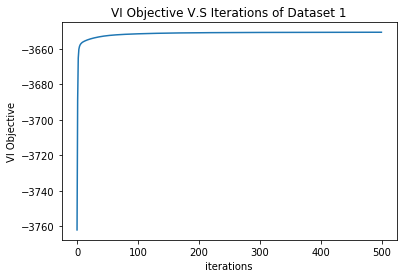

In [624]:
#dataset 1
plt.plot(range(500), L1)
plt.xlabel("iterations")
plt.ylabel("VI Objective")
plt.title('VI Objective V.S Iterations of Dataset 1')

Text(0.5,1,'VI Objective V.S Iterations of Dataset 2')

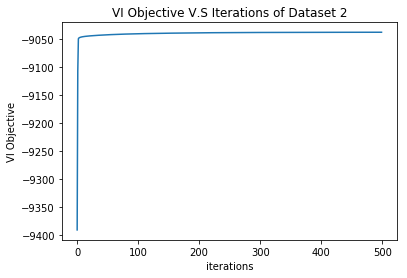

In [625]:
#dataset 2
plt.plot(range(500), L2)
plt.xlabel("iterations")
plt.ylabel("VI Objective")
plt.title('VI Objective V.S Iterations of Dataset 2')

Text(0.5,1,'VI Objective V.S Iterations of Dataset 3')

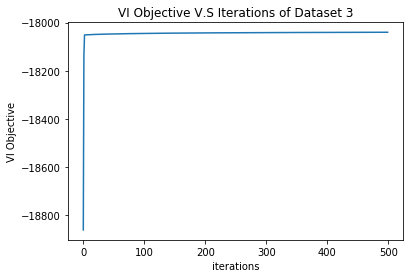

In [626]:
#dataset 3
plt.plot(range(500), L3)
plt.xlabel("iterations")
plt.ylabel("VI Objective")
plt.title('VI Objective V.S Iterations of Dataset 3')

## b)

Text(0.5,1,'1/Expected q Alpha k V.S k-th dimension Dataset 1')

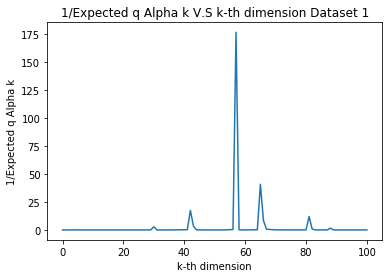

In [627]:
#dataset1
plt.plot(range(101), (1/(at1/bt1)).flatten())
plt.xlabel("k-th dimension")
plt.ylabel("1/Expected q Alpha k")
plt.title('1/Expected q Alpha k V.S k-th dimension Dataset 1')

Text(0.5,1,'1/Expected q Alpha k V.S k-th dimension Dataset 2')

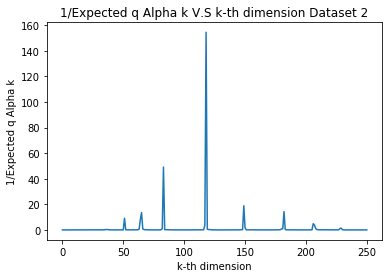

In [628]:
#dataset2
plt.plot(range(251), (1/(at2/bt2)).flatten())
plt.xlabel("k-th dimension")
plt.ylabel("1/Expected q Alpha k")
plt.title('1/Expected q Alpha k V.S k-th dimension Dataset 2')

Text(0.5,1,'1/Expected q Alpha k V.S k-th dimension Dataset 3')

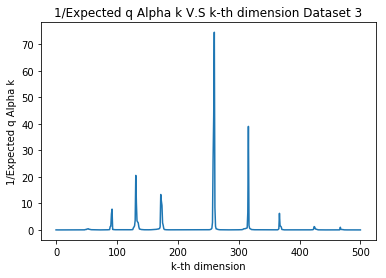

In [629]:
#dataset3
plt.plot(range(501), (1/(at3/bt3)).flatten())
plt.xlabel("k-th dimension")
plt.ylabel("1/Expected q Alpha k")
plt.title('1/Expected q Alpha k V.S k-th dimension Dataset 3')

## c)

In [630]:
ft1

55.08152777897169

In [631]:
print("Expected q Lemda for dataset 1: ",ft1/et1)
print("Expected q Lemda for dataset 2: ",ft2/et2)
print("Expected q Lemda for dataset 3: ",ft3/et3)

Expected q Lemda for dataset 1:  1.0800299564504252
Expected q Lemda for dataset 2:  0.8994629800787614
Expected q Lemda for dataset 3:  0.9781435918475727


## d)

In [632]:
Yh.shape

(100, 1)

Text(0.5,1,'Vartional Inference Y V.S Z of Dataset 1')

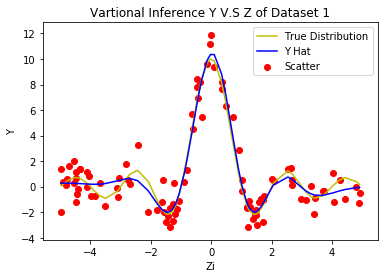

In [633]:
#dataset 1
Yh1 = X1.T.dot(mut1)
plt.plot(Z1, 10 * np.sinc(Z1),c = "y", label='True Distribution')
plt.plot(Z1, Yh1, c = 'b', label= 'Y Hat')
plt.scatter(Z1, Y1, c='r', label='Scatter')
plt.legend()
plt.xlabel('Zi')
plt.ylabel('Y')
plt.title('Vartional Inference Y V.S Z of Dataset 1')

Text(0.5,1,'Vartional Inference Y V.S Z of Dataset 2')

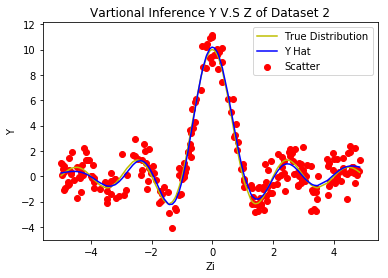

In [634]:
#dataset 2
Yh2 = X2.T.dot(mut2)
plt.plot(Z2, 10 * np.sinc(Z2),c = "y", label='True Distribution')
plt.plot(Z2, Yh2, c = 'b', label= 'Y Hat')
plt.scatter(Z2, Y2, c='r', label='Scatter')
plt.legend()
plt.xlabel('Zi')
plt.ylabel('Y')
plt.title('Vartional Inference Y V.S Z of Dataset 2')

Text(0.5,1,'Vartional Inference Y V.S Z of Dataset 3')

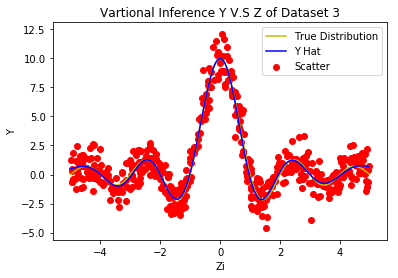

In [635]:
#dataset 3
Yh3 = X3.T.dot(mut3)
plt.plot(Z3, 10 * np.sinc(Z3),c = "y", label='True Distribution')
plt.plot(Z3, Yh3, c = 'b', label= 'Y Hat')
plt.scatter(Z3, Y3, c='r', label='Scatter')
plt.legend()
plt.xlabel('Zi')
plt.ylabel('Y')
plt.title('Vartional Inference Y V.S Z of Dataset 3')